In [3]:
import sqlite3

db_path = r"C:\Users\shaurya\OneDrive\Desktop\ultrasound_db.sqlite"

conn = sqlite3.connect(db_path)
cursor = conn.cursor()

sql_file = r"C:\Users\shaurya\OneDrive\Desktop\origin dataset\RC-Datasets\RC2\ultrasound_db.sql"
with open(sql_file, "r", encoding="utf-8") as f:
    sql_script = f.read()

cursor.executescript(sql_script)

conn.commit()
conn.close()

print("Database created successfully!")


Database created successfully!


In [4]:
import pandas as pd

conn = sqlite3.connect(db_path)

query = """
SELECT 
    p.PatientID, p.FirstName, p.LastName, p.DateOfBirth, p.Gender, 
    a.AppointmentID, a.AppointmentDate, a.Reason, 
    u.ResultID, u.Image, u.Report AS UltrasoundReport,
    d.Conditions AS Diagnosis, 
    b.TotalAmount, b.PaymentStatus,
    m.MedicationName, m.Dosage
FROM Patients p
LEFT JOIN Appointments a ON p.PatientID = a.PatientID
LEFT JOIN Ultrasound_Results u ON p.PatientID = u.PatientID
LEFT JOIN Diagnosis d ON p.PatientID = d.PatientID
LEFT JOIN Billing b ON p.PatientID = b.PatientID
LEFT JOIN Medications m ON p.PatientID = m.PatientID
"""

df = pd.read_sql(query, conn)

df.to_csv("consolidated_data.csv", index=False, encoding="utf-8")

print("Consolidated data saved as consolidated_data.csv")

conn.close()


Consolidated data saved as consolidated_data.csv


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         30 non-null     int64  
 1   FirstName         30 non-null     object 
 2   LastName          30 non-null     object 
 3   DateOfBirth       30 non-null     object 
 4   Gender            30 non-null     object 
 5   AppointmentID     20 non-null     float64
 6   AppointmentDate   20 non-null     object 
 7   Reason            20 non-null     object 
 8   ResultID          20 non-null     float64
 9   Image             0 non-null      float64
 10  UltrasoundReport  20 non-null     object 
 11  Diagnosis         20 non-null     object 
 12  TotalAmount       20 non-null     float64
 13  PaymentStatus     20 non-null     object 
 14  MedicationName    20 non-null     object 
 15  Dosage            20 non-null     object 
dtypes: float64(4), int64(1), object

None

,PatientID,FirstName,LastName,DateOfBirth,Gender,AppointmentID,AppointmentDate,Reason,ResultID,Image,UltrasoundReport,Diagnosis,TotalAmount,PaymentStatus,MedicationName,Dosage
0,1,John,Doe,1980-05-15,Male,1.0,2025-02-20 09:00:00,Routine Check-Up,1.0,NaN,Normal results.,High Cholesterol,200.0,Paid,Metformin,500mg
1,1,John,Doe,1980-05-15,Male,1.0,2025-02-20 09:00:00,Routine Check-Up,1.0,NaN,Normal results.,Type 2 Diabetes,200.0,Paid,Metformin,500mg
2,2,Jane,Smith,1992-07-20,Female,2.0,2025-02-21 10:30:00,Heart Consultation,2.0,NaN,No abnormalities detected.,Arthritis,150.0,Pending,Lisinopril,10mg
3,2,Jane,Smith,1992-07-20,Female,2.0,2025-02-21 10:30:00,Heart Consultation,2.0,NaN,No abnormalities detected.,Hypertension,150.0,Pending,Lisinopril,10mg
4,3,Michael,Brown,1985-03-10,Male,3.0,2025-02-22 11:15:00,Neurological Examination,3.0,NaN,Further tests recommended.,Asthma,300.0,Paid,Ventolin,2 puffs


Missing Values:


PatientID            0
FirstName            0
LastName             0
DateOfBirth          0
Gender               0
AppointmentID       10
AppointmentDate     10
Reason              10
ResultID            10
Image               30
UltrasoundReport    10
Diagnosis           10
TotalAmount         10
PaymentStatus       10
MedicationName      10
Dosage              10
dtype: int64

Summary Statistics:


,PatientID,FirstName,LastName,DateOfBirth,Gender,AppointmentID,AppointmentDate,Reason,ResultID,Image,UltrasoundReport,Diagnosis,TotalAmount,PaymentStatus,MedicationName,Dosage
count,30.000000,30,30,30,30,20.000000,20,20,20.000000,0.0,20,20,20.000000,20,20,20
unique,NaN,19,18,20,2,NaN,10,10,NaN,NaN,9,20,NaN,2,9,9
top,NaN,Laura,Lopez,1980-05-15,Male,NaN,2025-02-20 09:00:00,Routine Check-Up,NaN,NaN,Normal results.,High Cholesterol,NaN,Paid,Metformin,500mg
freq,NaN,3,3,2,15,NaN,2,2,NaN,NaN,4,1,NaN,10,4,4
mean,8.833333,NaN,NaN,NaN,NaN,5.500000,NaN,NaN,5.500000,NaN,NaN,NaN,222.000000,NaN,NaN,NaN
std,5.614534,NaN,NaN,NaN,NaN,2.946898,NaN,NaN,2.946898,NaN,NaN,NaN,54.637562,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,150.000000,NaN,NaN,NaN
25%,4.250000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,NaN,NaN,180.000000,NaN,NaN,NaN
50%,8.000000,NaN,NaN,NaN,NaN,5.500000,NaN,NaN,5.500000,NaN,NaN,NaN,210.000000,NaN,NaN,NaN
75%,12.750000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,8.000000,NaN,NaN,NaN,270.000000,NaN,NaN,NaN


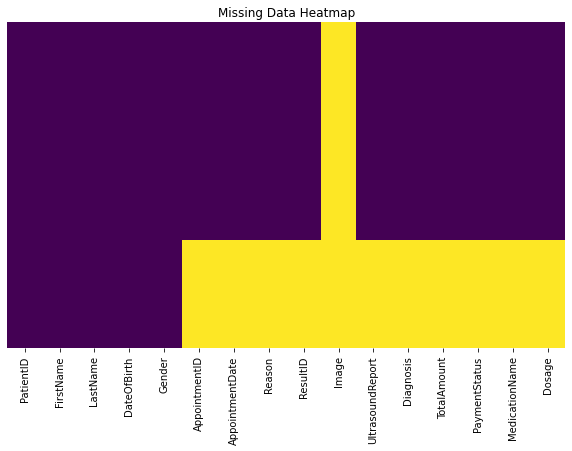

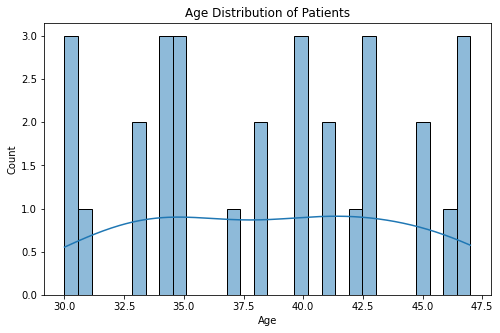

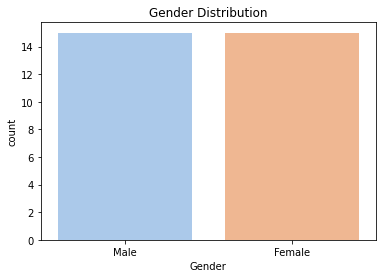

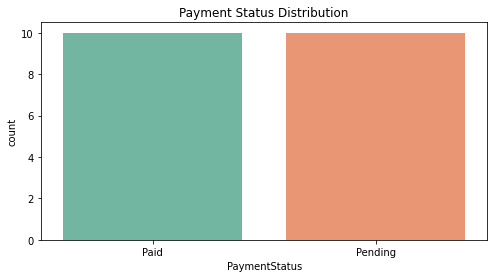

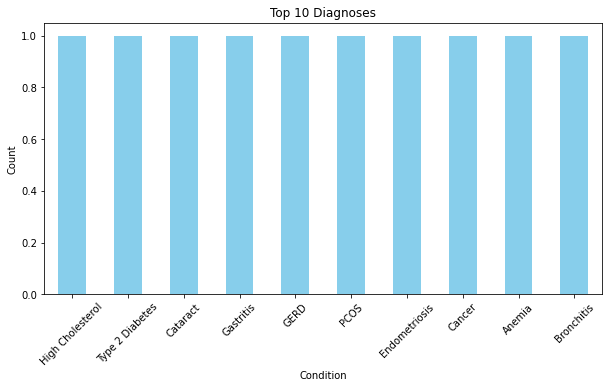

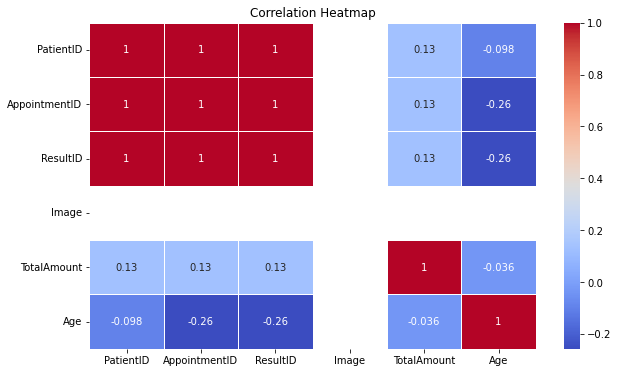

Exploratory analysis completed.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("consolidated_data.csv")

print("Data Overview:")
display(df.info())
display(df.head())

print("Missing Values:")
display(df.isnull().sum())

print("Summary Statistics:")
display(df.describe(include='all'))

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

df['Age'] = pd.to_datetime("today").year - pd.to_datetime(df['DateOfBirth']).dt.year
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='PaymentStatus', palette='Set2')
plt.title("Payment Status Distribution")
plt.show()

plt.figure(figsize=(10,5))
df['Diagnosis'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Diagnoses")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

print("Exploratory analysis completed.")


In [1]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [1]:
from graphviz import Digraph

flowchart = Digraph(format='png')

flowchart.node('A', 'Start', shape='oval')
flowchart.node('B', 'Load PDF File(s)', shape='rectangle')
flowchart.node('C', 'Scanned PDF?', shape='diamond') 
flowchart.node('D', 'Use Poppler for Text Extraction', shape='rectangle')
flowchart.node('E', 'Use Tesseract OCR for Image-to-Text', shape='rectangle')
flowchart.node('F', 'Extracted Raw Text', shape='parallelogram')  
flowchart.node('G', 'Preprocessing:\n- Remove Noise\n- Normalize Text\n- Tokenization', shape='rectangle')
flowchart.node('H', 'Identify Sensitive Information', shape='rectangle')
flowchart.node('I', 'Apply Anonymization & Hashing', shape='rectangle')
flowchart.node('J', 'Store Processed Data in JSON Format', shape='parallelogram')  
flowchart.node('K', 'End', shape='oval')

flowchart.edge('A', 'B')
flowchart.edge('B', 'C')
flowchart.edge('C', 'D', label="No")  
flowchart.edge('C', 'E', label="Yes")  
flowchart.edge('D', 'F')
flowchart.edge('E', 'F')
flowchart.edge('F', 'G')
flowchart.edge('G', 'H')import os
import re
from graphviz import Digraph

graphviz_path = "C:\\Program Files\\Graphviz\\bin"

if not any(re.search(r'Graphviz[\\/]bin', path, re.IGNORECASE) for path in os.environ["PATH"].split(os.pathsep)):
    os.environ["PATH"] += os.pathsep + graphviz_path

try:
    flowchart = Digraph(format='png')

    flowchart.node('A', 'Start', shape='oval')
    flowchart.node('B', 'Load PDF File(s)', shape='rectangle')
    flowchart.node('C', 'Scanned PDF?', shape='diamond')  
    flowchart.node('D', 'Use Poppler for Text Extraction', shape='rectangle')
    flowchart.node('E', 'Use Tesseract OCR for Image-to-Text', shape='rectangle')
    flowchart.node('F', 'Extracted Raw Text', shape='parallelogram')  
    flowchart.node('G', 'Preprocessing:\n- Remove Noise\n- Normalize Text\n- Tokenization', shape='rectangle')
    flowchart.node('H', 'Identify Sensitive Information using Regex', shape='rectangle')
    flowchart.node('I', 'Apply Anonymization & Hashing', shape='rectangle')
    flowchart.node('J', 'Validate Data & Error Handling', shape='rectangle')
    flowchart.node('K', 'Store Processed Data in JSON Format', shape='parallelogram')  
    flowchart.node('L', 'Generate Logs & Reports', shape='rectangle')
    flowchart.node('M', 'End', shape='oval')

    flowchart.edge('A', 'B')
    flowchart.edge('B', 'C')
    flowchart.edge('C', 'D', label="No")  
    flowchart.edge('C', 'E', label="Yes") 
    flowchart.edge('D', 'F')
    flowchart.edge('E', 'F')
    flowchart.edge('F', 'G')
    flowchart.edge('G', 'H')
    flowchart.edge('H', 'I')
    flowchart.edge('I', 'J')
    flowchart.edge('J', 'K')
    flowchart.edge('K', 'L')
    flowchart.edge('L', 'M')

    flowchart.render('task1_flowchart', view=True)  

except Exception as e:
    print("Error:", e)
    print("Make sure Graphviz is correctly installed and accessible in the system PATH.")

flowchart.edge('H', 'I')
flowchart.edge('I', 'J')
flowchart.edge('J', 'K')

flowchart.render('task1_flowchart', view=True)  


'task1_flowchart.png'

In [3]:
from graphviz import Digraph

flowchart = Digraph(format='png')

flowchart.node('A', 'Start', shape='oval')
flowchart.node('B', 'Load Ultrasound Database', shape='rectangle')
flowchart.node('C', 'Extract Table Metadata & Relationships', shape='rectangle')
flowchart.node('D', 'Generate ER Diagram', shape='rectangle')
flowchart.node('E', 'Export Relationship Report', shape='parallelogram')  
flowchart.node('F', 'Consolidate Data into CSV Format', shape='rectangle')
flowchart.node('G', 'Check Data Consistency', shape='diamond')  
flowchart.node('H', 'Perform Data Cleaning (if needed)', shape='rectangle')
flowchart.node('I', 'Perform Exploratory Data Analysis', shape='rectangle')
flowchart.node('J', 'Apply Regex-Based Pattern Matching', shape='rectangle')
flowchart.node('K', 'Generate Statistical Summaries & Trends', shape='rectangle')
flowchart.node('L', 'Store Insights in Report Format', shape='parallelogram') 
flowchart.node('M', 'Export Processed Data & Reports', shape='rectangle')
flowchart.node('N', 'End', shape='oval')

flowchart.edge('A', 'B')
flowchart.edge('B', 'C')
flowchart.edge('C', 'D')
flowchart.edge('D', 'E')
flowchart.edge('C', 'F')
flowchart.edge('F', 'G')
flowchart.edge('G', 'I', label="Yes")  
flowchart.edge('G', 'H', label="No")   
flowchart.edge('H', 'I')
flowchart.edge('I', 'J')
flowchart.edge('J', 'K')
flowchart.edge('K', 'L')
flowchart.edge('L', 'M')
flowchart.edge('M', 'N')

flowchart.render('task2_flowchart', view=True)  


'task2_flowchart.png'